#### Université Paul Sabatier, M2MAPI3
# Big data - practical 1: perceptron and SVM
We advise to use [matplotlib](https://matplotlib.org/) for plots and [numpy](https://numpy.org/). The online documentation contains information regarding the use of these libraries how to use these libraries.

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import lines as mlines
import math as math
import numpy as np
import numpy.random as npr

## Exercice 1: estimation of the mean of a univariate random variable

Let $x_1,\ldots,x_n$ be a real numbers, their mean is given by
$$\bar{x} = \arg\min_y f(y) $$
Where 
$$f \colon y \mapsto \frac{1}{n} \sum_{i=1}^n (y-x_i)^2$$
The following code generates input data and plots f. 

**Question 0:** what are the inputs? what is the argmin? what is the min?

Empirical mean:
5.5


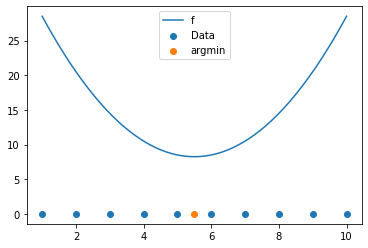

In [2]:
n = 10
x = np.linspace(1,10,10)
print("Empirical mean:")
print(np.mean(x))

plt.scatter(x, np.zeros(10), label = "Data")
plt.scatter(5.5, 0, label = "argmin")
y = np.linspace(10,100,100)/10
plt.plot(y, y**2 - 2 * np.mean(x) * y + np.mean(x**2), label = "f")
plt.legend()

**Question 1:** Implement the gradient descent algorithm on $f$ with $y_0 = 2$ and stepsize equal to $1/3$.
\begin{align*}
    y_{k+1} &= y_k - f'(y_k) / 3
\end{align*}
We set $f_k = f(y_k)$ for each $k$. Plot $f_k - f^*$ in logarithmic scale as a function of $k$. Plot the value of $|y_k - y^*|$, where $y^*$ is the argmin, as a function of $k$ in logarithmic scale. What can you say about these results? 

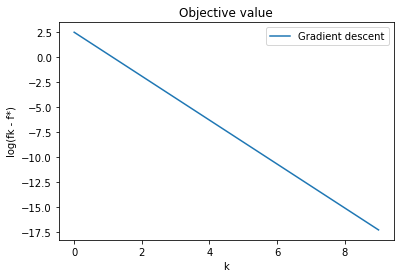

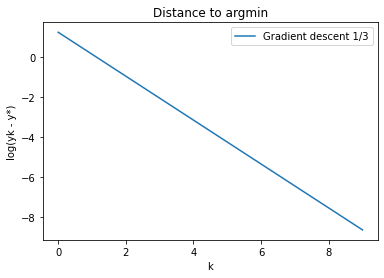

We are going to introduce minibatching strategies, we need the following
* $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes
* $(I_k)_{k \in \mathbb{N}}$ a sequence of independant random integers uniformly distributed on $\{1,\ldots, n\}$.

**Question 2:** how can you simulate the sequence $(I_k)_{k \in \mathbb{N}}$? Provide an illustration bellow

k = 0, random integer: 7
k = 1, random integer: 5
k = 2, random integer: 7
k = 3, random integer: 5
k = 4, random integer: 4
k = 5, random integer: 8
k = 6, random integer: 2
k = 7, random integer: 6
k = 8, random integer: 9
k = 9, random integer: 6
k = 10, random integer: 5
k = 11, random integer: 0
k = 12, random integer: 7
k = 13, random integer: 9
k = 14, random integer: 6
k = 15, random integer: 3
k = 16, random integer: 3
k = 17, random integer: 9
k = 18, random integer: 3
k = 19, random integer: 4


The following algorithm is an application of the minibatch gradient descent strategy on $f$. To compute $\bar{x}$. 
given $y_0 \in \mathbb{R}$ and $(\alpha_k)_{k \in \mathbb{N}}$ a sequence of positive step sizes:
\begin{align*}
    I_k &\sim U(\{1,\ldots,n\})\\
    y_{k+1} &= y_k - \alpha_k (y_k - x_{I_k})
\end{align*}

**Question 3** What is the expectation of $y_{k+1}$ given $y_k$? How does this algorithm relate to the gradient descent algorithm? How is it different?

**Question 4** Implement 300 iterations of this algorithm with $y_0 = 2$. Try constant step size $\alpha_k = \alpha$ for all $k$, with  $\alpha = 0.5, 0.1, 0.02$. Represent the iterates $y_k$ as a function of $k$. Make comments about the behavior of the algorithm. Is it similar to what you observed for gradient descent? How does the step size affects the result?

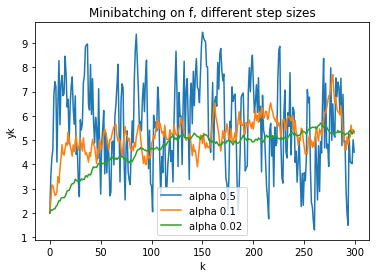

**Question 5:** Try the same algorithm with a step size of the form $\alpha_k = 1 / (k+1)$ for all $k$. Represent three runs of the algorithm on the same graph with 1000 iterations. Comments the results. 

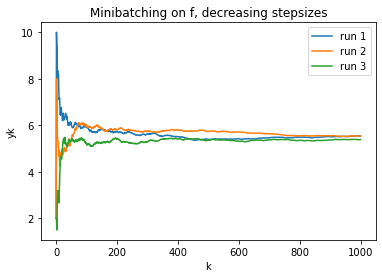

**Question 6:** Experiment with different step size regimes. Which conclusions can you make regarding these experiments? Comment on the sensitivity of the minibatch strategy to step sizes. Is the proposed minibatching strategy a good algorithm to estimate the mean? In which situation would it be favorable to use this strategy?

## Exercice 2: single layer perceptron (1957)

The following code provides a two label dataset in $\mathbb{R}^2$: $x_1,\ldots, x_n$ is a set of $n$ vectors in $\mathbb{R}^2$ and $y_1,\ldots,y_n$ are the corresponding labels ($-1$ or $1$). 

$X$ is a table of size $n \times 2$ and $y$ is a vector of labels of size $n$ (0 or 1). We also provide functions which allow to plot data and plot a line which equation is given by 
$$w^Tx + b = 0$$
for a vector $w \in \mathbb{R}^2$ and a bias term $b \in \mathbb{R}$.

In [7]:
## Generate data
n = 200
angles = 2 * math.pi * npr.rand(n) - math.pi / 4
radii = npr.rand(n) * 0.4 + 0.8
x1 = radii * np.cos(angles)
x2 = radii * np.sin(angles)
X = np.vstack((x1,x2)).transpose()
y = 1. * (angles > 3*math.pi/4) * 2 - 1

temp = y==-1.
X[temp,0] = X[temp,0] - 1
X[temp,1] = X[temp,1] + 0.5

## Functions for plots
def addline(w, b, label, xlim = (-2,1), ylim = (-1,2)):
    ## Adds a line to a plot
    if abs(w[1]) < 1e-3:
        ytemp = np.arange(ylim[0] * 100, ylim[1] * 100) / 100
        xtemp = - ytemp * w[1] / w[0] - b / w[0]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()
        
    else:
        xtemp = np.arange(xlim[0] * 100, xlim[1] * 100) / 100
        ytemp = - xtemp * w[0] / w[1] - b / w[1]
        tempSelect1 = (xtemp < xlim[1]) * (xtemp > xlim[0])
        tempSelect2 = (ytemp < ylim[1]) * (ytemp > ylim[0])
        xtemp = xtemp[tempSelect1 * tempSelect2]
        ytemp = ytemp[tempSelect1 * tempSelect2]
        plt.plot(xtemp, ytemp, label = label)
        plt.legend()


def plotData(X,y):
    ## Plot data
    for k in (-1,1):
        temp = y==k
        plt.plot(X[temp,0], X[temp,1], '.', label = k)

    plt.legend()
    plt.axis('equal')

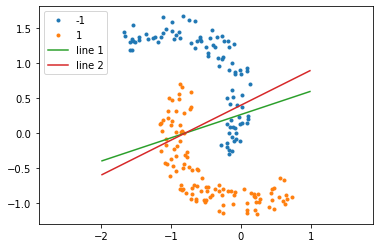

In [8]:
## Example of usage

plotData(X,y)
addline((1,-3), 0.8, "line 1")
addline((1,-2), 0.8, "line 2")


The perceptron algorithm aims at building a classifier of the form
\begin{align*}
    f_{w,b} \colon x \mapsto \mathrm{sign}(w^Tx + b)
\end{align*}
where $w \in \mathbb{R}^2$ and $b \in \mathbb{R}$ are weights and bias parameters.
The perceptron learning algorithm goes as follows: start with $w_0 \in \mathbb{R}^2$, $b_0 \in \mathbb{R}$ and iterate for $k \in \mathbb{N}$:
\begin{align*}
    &I_k  \sim U(\{1,\ldots, n\})\\
    &\begin{cases}
            w_{k+1} &= w_k + \alpha y_{I_k} x_{I_k} \qquad &b_{k+1} = b_k + \alpha y_{I_k}  \qquad &\text{ if } (w^Tx_{I_k}+b) y_{I_k} < 0 \\
        w_{k+1} &= w_k  \qquad &b_{k+1} = b_k  \qquad &\text{ otherwise }
    \end{cases}
\end{align*}
where $\alpha$ is a step parameter.

**Question 7:** Implement the algorithm and plot the data as well as the decision boundary given by the final iterate. Use the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 500 iterations
* $\alpha_k = 1$ for all $k$.

Plot data and the decision boundary corresponding to 5 different runs on the same picture. Print also the value of the bias and weight vector at the last iteration.

run 0, weight and bias :
[-2.73386389 -5.78467338] -1.0
run 1, weight and bias :
[-3.54766373 -3.72386929] -2.0
run 2, weight and bias :
[-2.74389796 -4.05833799] -2.0
run 3, weight and bias :
[-3.21182919 -4.23105511] 0.0
run 4, weight and bias :
[-3.44453499 -4.18361848] -1.0


Text(0.5, 1.0, 'Five runs of the perceptron algorithm')

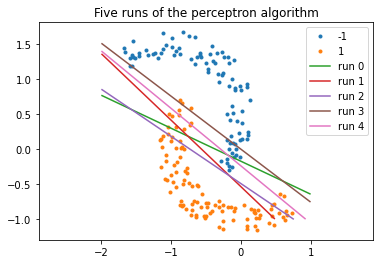

**Question 8:** What happens if you increase the number of iterations or change the step size? Can you explain what you observe? Does the algorithm seem to converge?

**Question 9:** consider a sequence of step sizes of the form $\alpha_k = 1 / \sqrt{k+1}$ for all $k$? What happens when the number of iteration increases say to $4000$, or $40000$?

run 0, weight and bias :
[-0.02304545 -0.02377747] -0.007764345944922386
run 1, weight and bias :
[-0.02450127 -0.03198871] -0.0008327420255153139
run 2, weight and bias :
[-0.02071841 -0.02920484] -0.005231352607035732
run 3, weight and bias :
[-0.0167954  -0.02486858] -0.00983722376501937
run 4, weight and bias :
[-0.02617737 -0.02611209] 0.0017827706002716374


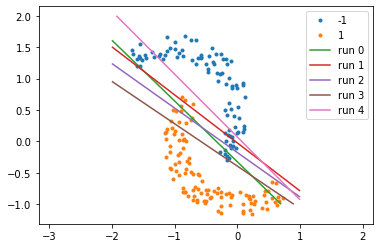

The perceptron algorithm attempts to minimize the following loss function 
\begin{align*}
    (perceptron) \qquad \min_{w,b} \frac{1}{n} \sum_{i=1}^n l_{\mathrm{perceptron}}(w^T x_i + b, y_i)
\end{align*}
where $l_{\mathrm{perceptron}}(s,y) = \max\{0, -ys\}$ for all $s$. It is actually a (sub)gradient method exactly of the same kind as what we have used in Exercise 1.

**Question 9:** Try to explain the preceeding algorithm in light of these elements. What is the solution to this minimization problem? Does it explain the behaviour observed in your experiments? Try to understand in which sense the algorithm is performing (sub)gradient descent, you may think about the loss function $l_{\mathrm{perceptron}}$ to be piecewise differentiable.

## Exercise 3: Support Vector Machine
Make sure that you finish exercise 2 before starting this one.


The support vector machine is given by the solution of
\begin{align*}
    (SVM) \qquad \min_{w,b} C \sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i) + \frac{1}{2} \|w\|^2 
\end{align*}
where $l_{\mathrm{SVM}}(s,y) = \max\{0,1 -ys\}$ for all $s$.
The purpose of this section is to derive an algorithm following similar ideas as the perceptron to find a solution for the SVM problem. 



**Question 10:** use [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) from `scikit-learn` library to solve the SVM problem for $C=1/10$. The kernel should be `'linear'`. Provide the value for the weight and intercept solutions. What happens if you change the value of $C$?

Weights:
[[-1.91758843 -2.74218119]]
Intercept:
[-0.44531672]


**Question 11:** We are going to consider an intermediate problem which is simpler than the SVM problem. Consider the unregularized SVM
\begin{align*}
    (pseudo-SVM) \qquad \min_{w,b} \frac{1}{n}\sum_{i=1}^n l_{\mathrm{SVM}}(w^T x_i + b, y_i)
\end{align*}
By analogy with the perceptron (the loss is almost the same), derive an algorithm to solve this problem. Perform the same experiment as what you did with the perceptron, using the following parameters
* initialize weights $w$ and bias $b$ to be equal to $0$
* 1000 iterations
* $\alpha_k = 1 / \sqrt{1+k}$ for all $k$.

What happens? What is the difference with the perceptron? Comment on the importance of the loss function.

run 0, weight and bias :
[-2.09338998 -3.01817924] -0.6411833098450701
run 1, weight and bias :
[-2.06972252 -3.01293586] -0.4932972828914267
run 2, weight and bias :
[-1.9239504 -2.7871208] -0.474345322139879
run 3, weight and bias :
[-2.14713856 -3.01257853] -0.5472559733276843
run 4, weight and bias :
[-1.84187244 -2.80140521] -0.38706036331377747


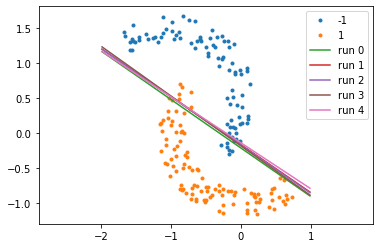

**Question 12:** Based on the previous question, devise an algorithm for the $(SVM)$ problem. This should be based on the response of question 11 with the idea that $(SVM)$ is a linear combination between the loss of $(pseudo-SVM)$ and the $L^2$ norm which gradient you know, with scaling factors $Cn$ and $1/2$. Reproduce the preceeding experiment with the following setting
* initialize weights $w$ and bias $b$ to be equal to $0$
* 10000 iterations
* $\alpha_k = 1 / (50 + k)$ for all $k$.

Which difference do you notice? Can you explain it?

run 0, weight and bias :
[-1.97148309 -2.81825553] -0.5179355626052045
run 1, weight and bias :
[-1.94715298 -2.72317375] -0.4193914696049763
run 2, weight and bias :
[-2.03938479 -2.87358063] -0.49523731775324903
run 3, weight and bias :
[-1.94896831 -2.85017153] -0.404207436914315
run 4, weight and bias :
[-1.98056813 -2.85860637] -0.4634779485000683


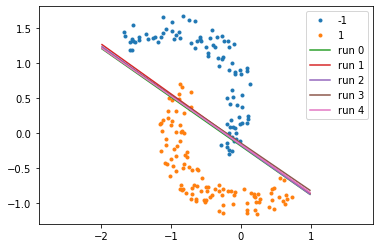

**Question 13:** Consider the previous experiment, for a single run, plot the distance between the current iterate and the solution given by `scikit-learn` in logarithmic scale. Plot data points should be computed every 100 iterates

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Convergence of the minibatch algorithm for the SVM')

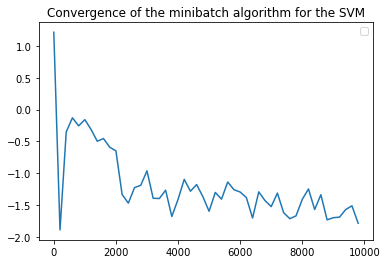

**Question 14:** Given $S_k = \frac{1}{k} \sum_{i=1}^k w_i$ and $w_{k+1}$, find a simple formula for $S_{k+1} = \frac{1}{k+1} \sum_{i=1}^k w_i$ without recomputing the sum.

Consider the previous experiment, but instead of $w_k$ and $b_k$ use the averages over all previously seen iterations:
\begin{align*}
    \bar{w}_k = \frac{1}{k} \sum_{i=1}^k w_i \\
    \bar{b}_k = \frac{1}{k} \sum_{i=1}^k b_i \\
\end{align*}
What is the effect of averaging? Use step size $\alpha_k = 0.1 / (500 +  \sqrt{k})$ for all $k$. What do you observe?

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Convergence of the minibatch algorithm with averaging for the SVM')

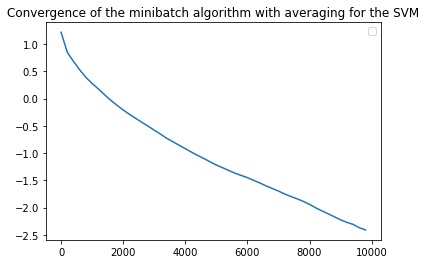

## Exercice 4: Back to the perceptron.

**Bonus question:** Getting back to the perceptron algorithm, run the algorithm with the following parameters
* initialize weights $w$ and bias $b$ to be equal to $1$
* 100000 iterations
* $\alpha_k = 10 / (10 + k)$ for all $k$.

Represent $5$ runs of the algorithm. What do you observe? In which sense does the algorithm seem to converge? If you can find a consistent explaination with a correct mathematical proof, I invite you to the restaurant.

run 0:
[-0.37333399 -0.40546961] -0.11076269372218221
run 1:
[-0.31589191 -0.34386292] -0.08807248602159169
run 2:
[-0.29925502 -0.32363085] -0.08871539567176964
run 3:
[-0.42193984 -0.45824164] -0.12009765905110144
run 4:
[-0.32364277 -0.35572106] -0.09012243794028055


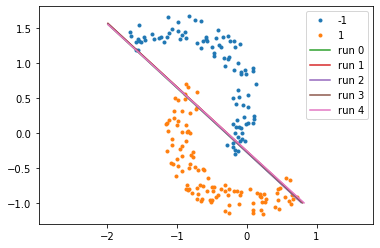